In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
fg=pd.read_csv("data.csv")

In [3]:
fg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
fg['RM'].fillna(fg['RM'].median(), inplace=True)

In [6]:
fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
fg['RM'].dtype

dtype('float64')

In [8]:
v=fg.corr()
v["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695668
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [9]:
fg.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         441
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [10]:
fg.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
fg['CHAS'].value_counts(normalize=True)

CHAS
0    0.93083
1    0.06917
Name: proportion, dtype: float64

<Axes: xlabel='RM', ylabel='MEDV'>

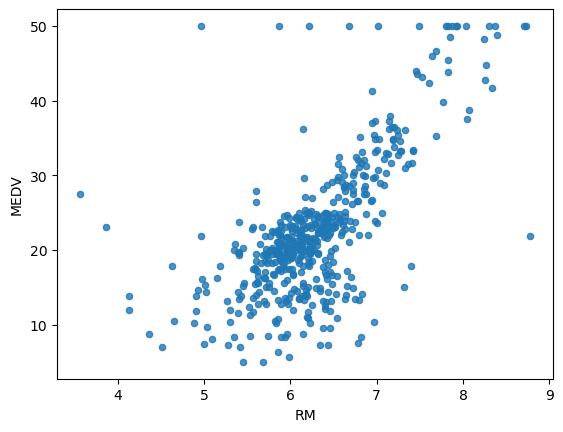

In [12]:
fg.plot(kind="scatter",y="MEDV",x="RM", alpha=0.8 )

In [13]:

train_set, test_set  = train_test_split(fg, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [14]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.609125,8.875058,0.00906,0.081437,0.26139,3.202962,88.9762
ZN,404.0,11.569307,23.152481,0.00000,0.000000,0.00000,20.000000,100.0000
INDUS,404.0,10.985050,6.894618,0.74000,5.130000,8.56000,18.100000,27.7400
CHAS,404.0,0.071782,0.258447,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.556484,0.117704,0.38500,0.452000,0.53800,0.631000,0.8710
RM,404.0,6.315950,0.709229,3.86300,5.890500,6.20850,6.636750,8.7800
AGE,404.0,68.556436,27.994922,2.90000,45.550000,77.70000,93.650000,100.0000
DIS,404.0,3.808195,2.131226,1.12960,2.087875,3.17575,5.400800,12.1265
RAD,404.0,9.356436,8.589721,1.00000,4.000000,5.00000,12.000000,24.0000
TAX,404.0,404.032178,166.172655,187.00000,279.000000,330.00000,666.000000,711.0000


In [15]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(fg, fg['CHAS']):
    strat_train_set = fg.loc[train_index]
    strat_test_set = fg.loc[test_index] 

In [16]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [17]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [19]:
t=my_pipeline.fit_transform(strat_train_set)

In [20]:
t.shape

(404, 14)

In [21]:
l= strat_train_set.drop("MEDV", axis=1)
k= strat_train_set["MEDV"].copy()

In [22]:
model = RandomForestRegressor()
model.fit(t,k)

RandomForestRegressor()

In [23]:
model.score

<bound method RegressorMixin.score of RandomForestRegressor()>

In [28]:
some_data = l.iloc[:5]

In [29]:
some_labels = k.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_labels)

ValueError: Expected 2D array, got 1D array instead:
array=[21.9 24.5 16.7 23.1 23. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.